In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'keras_preprocessing'

In [2]:
pip install keras-preprocessing

     ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [8]:
TRAIN_DIR = 'C:/Users/irfan/Downloads/face detection/images/train'
TEST_DIR = 'C:/Users/irfan/Downloads/face detection/images/images/validation'

In [9]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [10]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
                                                   image    label
0      C:/Users/irfan/Downloads/face detection/images...    angry
1      C:/Users/irfan/Downloads/face detection/images...    angry
2      C:/Users/irfan/Downloads/face detection/images...    angry
3      C:/Users/irfan/Downloads/face detection/images...    angry
4      C:/Users/irfan/Downloads/face detection/images...    angry
...                                                  ...      ...
19626  C:/Users/irfan/Downloads/face detection/images...  neutral
19627  C:/Users/irfan/Downloads/face detection/images...  neutral
19628  C:/Users/irfan/Downloads/face detection/images...  neutral
19629  C:/Users/irfan/Downloads/face detection/images...  neutral
19630  C:/Users/irfan/Downloads/face detection/images...  neutral

[19631 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                  image     label
0     C:/Users/irfan/Downloads/face detection/images...     angry
1     C:/Users/irfan/Downloads/face detection/images...     angry
2     C:/Users/irfan/Downloads/face detection/images...     angry
3     C:/Users/irfan/Downloads/face detection/images...     angry
4     C:/Users/irfan/Downloads/face detection/images...     angry
...                                                 ...       ...
7061  C:/Users/irfan/Downloads/face detection/images...  surprise
7062  C:/Users/irfan/Downloads/face detection/images...  surprise
7063  C:/Users/irfan/Downloads/face detection/images...  surprise
7064  C:/Users/irfan/Downloads/face detection/images...  surprise
7065  C:/Users/irfan/Downloads/face detection/images...  surprise

[7066 rows x 2 columns]


In [12]:
from tqdm.notebook import tqdm

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [14]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/19631 [00:00<?, ?it/s]

C:\Users\irfan\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [17]:
from sklearn.preprocessing import LabelEncoder

# Fit LabelEncoder on ALL labels (train + test)
le = LabelEncoder()
all_labels = pd.concat([train['label'], test['label']])
le.fit(all_labels)

# Transform labels
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

# One-hot encode
num_classes = len(le.classes_)  # Automatically detect number of classes
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print("Class mapping:", dict(zip(le.classes_, range(num_classes))))

Class mapping: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [20]:
from keras.models import Sequential
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Model
model = Sequential()
model.add(InputLayer(input_shape=(48, 48, 1)))  # Explicit input layer

# Convolutional Blocks
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output
model.add(Dense(7, activation='softmax'))

# Compile (FIXED: metrics as list)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 144s 935ms/step - accuracy: 0.3662 - loss: 1.4089 - val_accuracy: 0.2656 - val_loss: 3.8521
Epoch 2/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 143s 931ms/step - accuracy: 0.3933 - loss: 1.3650 - val_accuracy: 0.3474 - val_loss: 3.5676
Epoch 3/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.4534 - loss: 1.2769 - val_accuracy: 0.3660 - val_loss: 3.5789
Epoch 4/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.4883 - loss: 1.2149 - val_accuracy: 0.4032 - val_loss: 3.8830
Epoch 5/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.5182 - loss: 1.1651 - val_accuracy: 0.3941 - val_loss: 3.6619
Epoch 6/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.5333 - loss: 1.1400 - val_accuracy: 0.4195 - val_loss: 3.9122
Epoch 7/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - accuracy: 0.5443 - loss: 1.1050 - val_accuracy: 0.4267 - val_loss: 4.1093
Epoch 8/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.5495 - loss: 1.0

154/154 ━━━━━━━━━━━━━━━━━━━━ 149s 969ms/step - accuracy: 0.7440 - loss: 0.6670 - val_accuracy: 0.5074 - val_loss: 7.1060
Epoch 51/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 160s 1s/step - accuracy: 0.7400 - loss: 0.6730 - val_accuracy: 0.5067 - val_loss: 7.5890
Epoch 52/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 147s 953ms/step - accuracy: 0.7405 - loss: 0.6730 - val_accuracy: 0.5089 - val_loss: 7.8534
Epoch 53/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 145s 944ms/step - accuracy: 0.7450 - loss: 0.6588 - val_accuracy: 0.5038 - val_loss: 7.6924
Epoch 54/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 147s 954ms/step - accuracy: 0.7486 - loss: 0.6530 - val_accuracy: 0.5103 - val_loss: 7.9991
Epoch 55/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 145s 943ms/step - accuracy: 0.7496 - loss: 0.6544 - val_accuracy: 0.5076 - val_loss: 8.3975
Epoch 56/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 146s 949ms/step - accuracy: 0.7505 - loss: 0.6548 - val_accuracy: 0.5065 - val_loss: 8.2951
Epoch 57/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 145s 943ms/step - accuracy: 0.7545 -

Epoch 99/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 150s 973ms/step - accuracy: 0.8226 - loss: 0.4707 - val_accuracy: 0.5146 - val_loss: 12.8069
Epoch 100/100
154/154 ━━━━━━━━━━━━━━━━━━━━ 148s 961ms/step - accuracy: 0.8325 - loss: 0.4527 - val_accuracy: 0.5072 - val_loss: 12.6672


In [23]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [24]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [25]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [27]:
image = 'C:/Users/irfan/Downloads/face detection/images/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
model prediction is  fear


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
model prediction is  fear


C:\Users\irfan\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


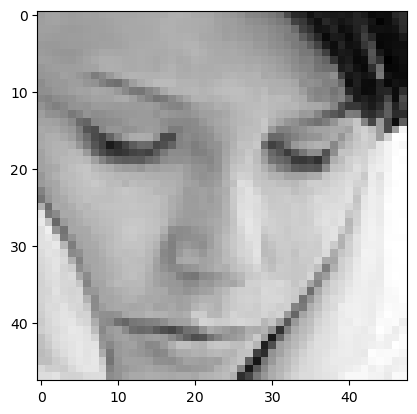

In [29]:
image = 'C:/Users/irfan/Downloads/face detection/images/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
model prediction is  fear


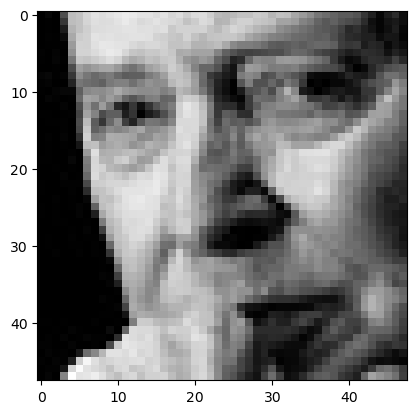

In [31]:
image = 'C:/Users/irfan/Downloads/face detection/images/images/train/fear/1013.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [32]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the pre-trained model architecture from JSON file
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Load the pre-trained model weights
model.load_weights("facialemotionmodel.h5")

# Load the Haar cascade classifier for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Define a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open the webcam (camera)
webcam = cv2.VideoCapture(0)

# Define labels for emotion classes
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    # Read a frame from the webcam
    i, im = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)

    try:
        # For each detected face, perform facial emotion recognition
        for (p, q, r, s) in faces:
            # Extract the region of interest (ROI) which contains the face
            image = gray[q:q + s, p:p + r]

            # Draw a rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)

            # Resize the face image to the required input size (48x48)
            image = cv2.resize(image, (48, 48))

            # Extract features from the resized face image
            img = extract_features(image)

            # Make a prediction using the trained model
            pred = model.predict(img)

            # Get the predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Display the predicted emotion label near the detected face
            cv2.putText(im, f'Emotion: {prediction_label}', (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))

        # Display the frame with annotations in real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()

FileNotFoundError: [Errno 2] No such file or directory: 'facialemotionmodel.json'